# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [ ]:
#HEj

import numpy as np
import pandas as pd 
from scipy import optimize
import matplotlib.pyplot as plt

# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})



# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
import HouseholdSpecializationModel

# Question 1

**Explain how you solve the model**

0.5
1.0
namespace(LM=4.5, HM=4.5, LF=4.5, HF=4.5)
 Sigma = 0.50 Alpha = 0.25    Ratio: 0.55
 Sigma = 0.50 Alpha = 0.50    Ratio: 1.00
 Sigma = 0.50 Alpha = 0.75    Ratio: 1.83
 Sigma = 1.00 Alpha = 0.25    Ratio: 0.31
 Sigma = 1.00 Alpha = 0.50    Ratio: 1.00
 Sigma = 1.00 Alpha = 0.75    Ratio: 3.25
 Sigma = 1.50 Alpha = 0.25    Ratio: 0.21
 Sigma = 1.50 Alpha = 0.50    Ratio: 1.00
 Sigma = 1.50 Alpha = 0.75    Ratio: 4.67


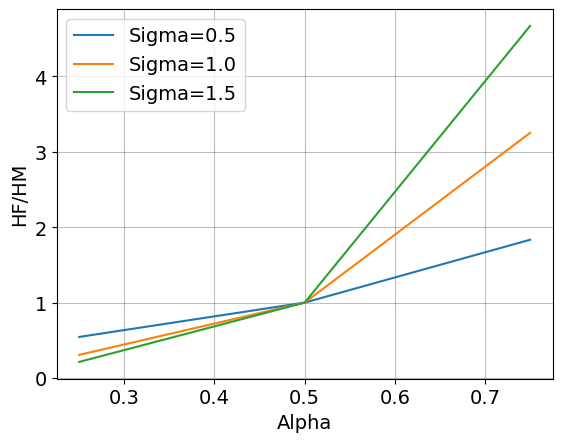

In [135]:
# code for solving the model (remember documentation and comments)

from HouseholdSpecializationModel import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

print(model.par.alpha)
print(model.par.sigma)

model.solve_discrete()
print(model.solve_discrete())



#Test = HouseholdSpecializationModelClass() 

#for alpha in (0.25, 0.50, 0.75):
 #   Test.par.alpha = alpha
  #  Test.solve_discrete()
   # print(Test.solve_discrete())
    


#for sigma in (0, 0.5, 1.0):
#    model.par.sigma = sigma
#    model.solve_discrete()
#    print(model.solve_discrete())

#Question 1

list_alphas = [ 0.25, 0.5, 0.75]
list_sigmas = [ 0.5, 1.0, 1.5]
results_ratio = {}

#Solving
for sigma in list_sigmas:
    model.par.sigma = sigma
    for alpha in list_alphas:
        model.par.alpha = alpha
        opt = model.solve_discrete()
        relative_hours = opt.HF/opt.HM
        results_ratio[(alpha, sigma)] = opt.HF/opt.HM

        print(f' Sigma = {model.par.sigma:.2f} Alpha = {model.par.alpha:.2f}    Ratio: {relative_hours:.2f}')



#Plotting
fig, ax = plt.subplots()
for sigma in list_sigmas:
    y = [results_ratio[(alpha, sigma)] for alpha in list_alphas]
    ax.plot(list_alphas, y, label=f"Sigma={sigma}")
ax.set_xlabel("Alpha")
ax.set_ylabel("HF/HM")
ax.legend()
plt.show()




# Question 2

Explain your code and procedure

[2.07944154 1.60943791 1.54044504 1.54044504 1.46633707]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


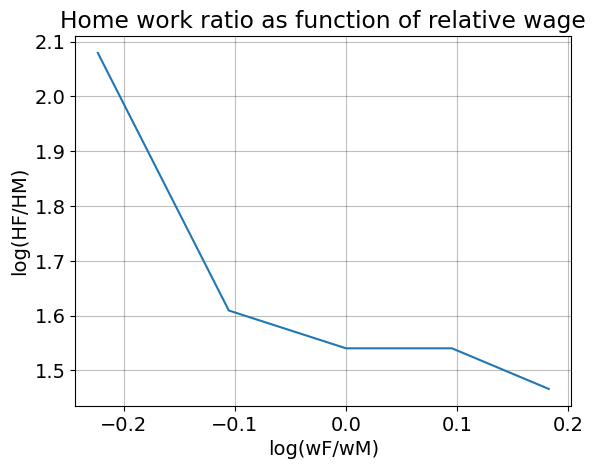

In [136]:
# Question 2

results_workratio = np.empty(5)
results_wageratio = np.empty(5)

list_wF = [0.8, 0.9, 1.0, 1.1, 1.2]

for i, wF in enumerate(list_wF):
    model.par.wF = wF
    opt = model.solve_discrete()
    results_workratio[i] = np.log(opt.HF/opt.HM)
    results_wageratio[i] = np.log(model.par.wF/model.par.wM)


print(results_workratio)
print(results_wageratio)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(results_wageratio, results_workratio)
ax.set_title('Home work ratio as function of relative wage')
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)');




# Question 3

Explain your code and procedure

LM = 5.9154182082867575, HM = 4.047072476422859, LF = 2.927144916558223, LH = 5.078645669955345 
LM = 4.560197743691428, HM = 4.486684659927464, LF = 4.413814136830682, LH = 4.487389644505803 
LM = 4.454951764762971, HM = 4.454951761209072, LF = 4.454951764762971, LH = 4.454951761209072 
LM = 4.3510624808284595, HM = 4.415057024145378, LF = 4.47839235175755, LH = 4.4144453697974315 
LM = 3.2912942990244516, HM = 4.534140480589426, LF = 5.388719210775638, LH = 4.206473052485042 
[ 2.27050851e-01  1.57115833e-04  0.00000000e+00 -1.38547864e-04
 -7.50109936e-02]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


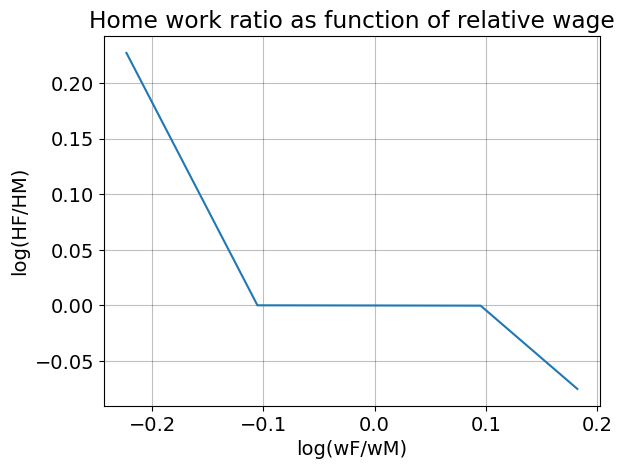

In [154]:
# code
model.par.wF = 1
model.par.sigma = 1
model.par.alpha = 0.5

# model.solve()


results_con_workratio = np.empty(5)
results_con_wageratio = np.empty(5)

for i, wF in enumerate(list_wF):
    model.par.wF = wF
    opt = model.solve()
    results_con_workratio[i] = np.log(opt.HF/opt.HM)
    results_con_wageratio[i] = np.log(model.par.wF/model.par.wM)
    print(f'LM = {opt.LM}, HM = {opt.HM}, LF = {opt.LF}, LH = {opt.HF} ')

print(results_con_workratio)
print(results_con_wageratio)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(results_con_wageratio, results_con_workratio)
ax.set_title('Home work ratio as function of relative wage')
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)');



ADD CONCISE CONLUSION.

In [215]:





model.estimate()
print(f' deviation = {(0.4-model.sol.beta0)**2+(-0.1- model.sol.beta1)**2}')

print(model.sol.beta1)

print(model.par.sigma)

print(model.par.alpha)



 deviation = 0.048907717597201084
-0.03923508944612154
0.046220603233148666
0.9829408506056356
